In [80]:
#드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 대한민국 대통령 취임식 연설문을 활용한 텍스트 마이닝
* 각 대통령의 연설문 특징 분석
* 가장 많이 언급된 단어는 무엇인가
* 정치색(진보/보수) 성향이 담겨있는가
* 가장 중점을 두고 있는 분야/대상 찾을 수 있는가

## 1.데이터 준비하기

In [81]:
!pip install koreanize-matplotlib
!pip install konlpy    #한글 형태소분석

In [82]:
import pandas as pd
import re  #문자열 패턴 추출 , 정규식 단어 추출?
import konlpy
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [83]:
moon=open('/content/drive/MyDrive/abc부트캠프/visual/3 텍스트분석/data/문재인_연설문.txt').read()
moon

'존경하고 사랑하는 국민 여러분!\n감사합니다. 국민 여러분의 위대한 선택에 머리 숙여 깊이 감사드립니다.\n\n저는 오늘 대한민국 제19대 대통령으로서 새로운 대한민국을 향해 첫걸음을내딛습니다. 지금 제 두 어깨는 국민 여러분으로부터 부여받은 막중한 소명감으로 무겁습니다. 지금 제 가슴은 한 번도 경험하지 못한 나라를 만들겠다는 열정으로 뜨겁습니다. 그리고 지금 제 머리는 통합과 공존의 새로운 세상을 열어 갈청사진으로 가득 차 있습니다.\n\n우리가 만들어 가려는 새로운 대한민국은 숱한 좌절과 패배에도 불구하고 우리 선대들이 일관되게 추구했던 나라입니다. 또한 많은 희생과 헌신을 감내하며 우리 젊은이들이 그토록 이루고 싶어 했던 나라입니다. 그런 대한민국을 만들기위해 저는 역사와 국민 앞에 두렵지만 겸허히 대한민국 제19대 대통령으로서 책임과 소명을 다할 것을 천명합니다.\n\n함께 선거를 치른 후보들께 감사의 말씀과 함께 심심한 위로를 전합니다. 이번 선거에서는 승자도 패자도 없습니다. 우리는 새로운 대한민국을 함께 이끌어 가야 할 동반자입니다. 이제 치열했던 경쟁의 순간을 뒤로하고 함께 손을 맞잡고 미래로 전진해야 합니다.\n\n존경하는 국민 여러분!\n지난 몇 달간 우리는 유례없는 정치적 격변기를 보냈습니다. 정치는 혼란했지만 국민은 위대했습니다. 현직 대통령의 탄핵과 구속 앞에서도 국민께서 대한민국의 앞길을 열어 주셨습니다. 우리 국민은 좌절하지 않고 오히려 전화위복의 계기로 삼아 마침내 오늘 새로운 세상을 열었습니다. 대한민국의 위대함은 국민의 위대함입니다. 그리고 이번 대통령 선거에서 우리 국민은 또 하나의 역사를 만들어 주셨습니다. 전국 각지에서 고른 지지로 새로운 대한민국을 선택해 주셨습니다. 오늘부터 저는 국민 모두의 대통령이 되겠습니다. 저를 지지하지 않았던 분도 진심으로 우리의 국민으로 섬기겠습니다. 저는 감히 약속드립니다. 2017년 5월 10일은 진정한 국민통합이 시작된 날로 역사에 기록될 것입니다.\n\n존경하고 사랑하는 국민 여러분

## 2.데이터 전처리

### 특수기호 / html태크 / 숫자 제거

In [84]:
#re.sub(정규식패턴)
#[가-힝] 모든 한글
# 제외로 ^만 가능 not(~) 사용불가

#정규식패턴 알파벳[A-Za-z]또는[aA-zZ]
#여러개를 쓸때 [aA-zZ0-9가-힣]


moon= re.sub('[^가-힣]',' ',moon)
moon

'존경하고 사랑하는 국민 여러분  감사합니다  국민 여러분의 위대한 선택에 머리 숙여 깊이 감사드립니다   저는 오늘 대한민국 제  대 대통령으로서 새로운 대한민국을 향해 첫걸음을내딛습니다  지금 제 두 어깨는 국민 여러분으로부터 부여받은 막중한 소명감으로 무겁습니다  지금 제 가슴은 한 번도 경험하지 못한 나라를 만들겠다는 열정으로 뜨겁습니다  그리고 지금 제 머리는 통합과 공존의 새로운 세상을 열어 갈청사진으로 가득 차 있습니다   우리가 만들어 가려는 새로운 대한민국은 숱한 좌절과 패배에도 불구하고 우리 선대들이 일관되게 추구했던 나라입니다  또한 많은 희생과 헌신을 감내하며 우리 젊은이들이 그토록 이루고 싶어 했던 나라입니다  그런 대한민국을 만들기위해 저는 역사와 국민 앞에 두렵지만 겸허히 대한민국 제  대 대통령으로서 책임과 소명을 다할 것을 천명합니다   함께 선거를 치른 후보들께 감사의 말씀과 함께 심심한 위로를 전합니다  이번 선거에서는 승자도 패자도 없습니다  우리는 새로운 대한민국을 함께 이끌어 가야 할 동반자입니다  이제 치열했던 경쟁의 순간을 뒤로하고 함께 손을 맞잡고 미래로 전진해야 합니다   존경하는 국민 여러분  지난 몇 달간 우리는 유례없는 정치적 격변기를 보냈습니다  정치는 혼란했지만 국민은 위대했습니다  현직 대통령의 탄핵과 구속 앞에서도 국민께서 대한민국의 앞길을 열어 주셨습니다  우리 국민은 좌절하지 않고 오히려 전화위복의 계기로 삼아 마침내 오늘 새로운 세상을 열었습니다  대한민국의 위대함은 국민의 위대함입니다  그리고 이번 대통령 선거에서 우리 국민은 또 하나의 역사를 만들어 주셨습니다  전국 각지에서 고른 지지로 새로운 대한민국을 선택해 주셨습니다  오늘부터 저는 국민 모두의 대통령이 되겠습니다  저를 지지하지 않았던 분도 진심으로 우리의 국민으로 섬기겠습니다  저는 감히 약속드립니다      년  월   일은 진정한 국민통합이 시작된 날로 역사에 기록될 것입니다   존경하고 사랑하는 국민 여러분  힘들었던 지난 세월

### 명사 단어 추출


* 한국어 형태소 분서기 : komoran, Hannaum, Kkma, Okt
* Kkma:  코코마? 서울대에서 만듦 (규칙이 강함 ,표준어만, 맞춤법 틀리면 아웃)
* Okt:  구트위터에서 만듦(규칙 널널)
* Hannaum :약간 느림
* komoran






In [85]:
# 한국어 형태소 분서기 : komoran, Hannaum, Kkma, Okt
#Kkma 코코마? 서울대에서 만듦 (규칙이 강함 ,표준어만, 맞춤법 틀리면 아웃)
#Okt 구트위터에서 만듦()
#Hannaum 약간 느림
#komoran


#Hannaum ,komoran 형태소 분석기를 활용한 명사 추출
hannaum = konlpy.tag.Hannanum()

h_moon_nn=hannaum.nouns(moon)  #nouns명사 추출
h_moon_nn



['존경',
 '사랑',
 '국민',
 '여러분',
 '감사',
 '국민',
 '여러분',
 '위대한',
 '선택',
 '머리',
 '저',
 '오늘',
 '대한민국',
 '저',
 '대',
 '대통령',
 '대한민국',
 '첫걸음을내딛습니다',
 '저',
 '두',
 '어깨',
 '국민',
 '여러분',
 '부',
 '막중',
 '소명감',
 '저',
 '가슴',
 '번',
 '경험',
 '나라',
 '열정',
 '저',
 '머리',
 '통합',
 '공존',
 '세상',
 '갈청사진',
 '우리',
 '대한민국',
 '좌절',
 '패배',
 '불구',
 '우리',
 '선대들',
 '일관',
 '추구',
 '나라',
 '희생',
 '헌신',
 '감내',
 '우리',
 '젊은이들',
 '나라',
 '대한민국',
 '만들기위해',
 '저',
 '역사',
 '국민',
 '앞',
 '겸허',
 '대한민국',
 '저',
 '대',
 '대통령',
 '책',
 '소명',
 '것',
 '천명',
 '선거',
 '후보들',
 '감사',
 '말씀',
 '심심',
 '위로',
 '이번',
 '선거',
 '승자',
 '패자',
 '우리',
 '대한민국',
 '동반자',
 '치열',
 '경쟁',
 '순간',
 '뒤',
 '손',
 '미래',
 '전진',
 '존경',
 '국민',
 '여러분',
 '몇',
 '간',
 '우리',
 '정치적',
 '격변기',
 '정치',
 '혼란',
 '국민',
 '위대',
 '현직',
 '대통령의',
 '탄핵',
 '구속',
 '앞',
 '국민',
 '대한민국',
 '앞길',
 '우리',
 '국민',
 '좌절',
 '전화위복',
 '계기',
 '오늘',
 '세상',
 '대한민국',
 '위대함',
 '국민',
 '위대함',
 '이번',
 '대통령',
 '선거',
 '우리',
 '국민',
 '하나',
 '역사',
 '전국',
 '각지',
 '지지',
 '대한민국',
 '선택',
 '오늘',
 '저',
 '국민',
 '모두',
 '대통령',
 '저',
 '분

In [86]:
komoran=konlpy.tag.Komoran()
k_moon_nn=komoran.nouns(moon)
k_moon_nn

['존경',
 '사랑',
 '국민',
 '여러분',
 '감사',
 '국민',
 '선택',
 '머리',
 '감사',
 '오늘',
 '대한민국',
 '대',
 '대통령',
 '대한민국',
 '첫걸음',
 '어깨',
 '국민',
 '부여',
 '소명감',
 '가슴',
 '번',
 '경험',
 '나라',
 '열정',
 '머리',
 '통합',
 '공존',
 '세상',
 '청사진',
 '차',
 '대한민국',
 '좌절',
 '패배',
 '선대',
 '추구',
 '나라',
 '희생',
 '헌신',
 '감내',
 '젊은이들',
 '나라',
 '대한민국',
 '역사',
 '국민',
 '앞',
 '대한민국',
 '대',
 '대통령',
 '책임',
 '소명',
 '것',
 '천명',
 '선거',
 '후보',
 '감사',
 '말씀',
 '위로',
 '이번',
 '선거',
 '승자',
 '패자',
 '대한민국',
 '가야',
 '동반자',
 '경쟁',
 '순간',
 '손',
 '미래',
 '전진',
 '존경',
 '국민',
 '여러분',
 '달',
 '간',
 '정치',
 '격변기',
 '정치',
 '혼란',
 '국민',
 '현직',
 '대통령',
 '탄핵',
 '구속',
 '앞',
 '국민',
 '대한민국',
 '앞길',
 '국민',
 '좌절',
 '전화위복',
 '계기',
 '오늘',
 '세상',
 '대한민국',
 '국민',
 '이번',
 '대통령 선거',
 '국민',
 '역사',
 '전국',
 '각지',
 '지지',
 '대한민국',
 '선택',
 '오늘',
 '국민',
 '모두',
 '대통령',
 '지지',
 '분도',
 '진심',
 '국민',
 '약속',
 '년',
 '월',
 '일',
 '국민',
 '통합',
 '시작',
 '역사',
 '기록',
 '것',
 '존경',
 '사랑',
 '국민',
 '여러분',
 '세월',
 '국민',
 '나라',
 '대통령',
 '문재인',
 '바',
 '로그',
 '질문',
 '시작',
 '오늘',
 '나라',
 '나라',
 '대통령',
 

### 데이터프레임 변환

In [87]:
h_word_df=pd.DataFrame({'word':h_moon_nn})
k_word_df=pd.DataFrame({'word':k_moon_nn})
h_word_df.head()

,word
0,존경
1,사랑
2,국민
3,여러분
4,감사


### 단어 빈도표 만들기

In [88]:
# 1)명사 단어(2개이상)의 수를 추출하는 count 컬럼 만들기

h_word_df['count']=h_word_df['word'].str.len()  #명사 길이가 2개 이상
h_word_df.head()

,word,count
0,존경,2
1,사랑,2
2,국민,2
3,여러분,3
4,감사,2


In [89]:
k_word_df['count']=k_word_df['word'].str.len()
k_word_df.head()

,word,count
0,존경,2
1,사랑,2
2,국민,2
3,여러분,3
4,감사,2


In [90]:
# 단어수가 2개 이상인 단어 남기기
h_word_df=h_word_df.query('count>=2')
h_word_df.head()

,word,count
0,존경,2
1,사랑,2
2,국민,2
3,여러분,3
4,감사,2


In [91]:
k_word_df=k_word_df.query('count>=2')
k_word_df.head()

,word,count
0,존경,2
1,사랑,2
2,국민,2
3,여러분,3
4,감사,2


In [92]:
print('코모란',k_word_df.shape,'한나눔',h_word_df.shape)

코모란 (393, 2) 한나눔 (399, 2)


In [93]:
# 2) 단어 사용의 빈도를 구하고, 빈도순의 정렬한 빈도표 생성
h_word_df=h_word_df.groupby('word',as_index=False).agg(n=('word','count')).sort_values('n',ascending=False) #내림차순 #집계함수로 빈도 구하기

h_word_df

,word,n
56,대통령,26
33,국민,23
59,대한민국,11
145,여러분,9
153,우리,8
...,...,...
243,협상,1
244,혼란,1
245,후보들,1
246,훗날,1


In [94]:
k_word_df=k_word_df.groupby('word',as_index=False).agg(n=('word','count')) #집계함수로 빈도 구하기
k_word_df=k_word_df.sort_values('n',ascending=False) #내림차순
k_word_df

,word,n
47,대통령,31
29,국민,24
49,대한민국,11
39,나라,10
127,여러분,6
...,...,...
218,협상,1
219,혼란,1
220,후보,1
221,훗날,1


### 단어 빈도 상위 20개 추출

In [95]:
h_top20=h_word_df.head(20)
k_top20=k_word_df.head(20)
display(h_top20.head())
display(k_top20.head())

,word,n
56,대통령,26
33,국민,23
59,대한민국,11
145,여러분,9
153,우리,8


,word,n
47,대통령,31
29,국민,24
49,대한민국,11
39,나라,10
127,여러분,6


## 3.단어 빈도 시각화

### hananum 과 komoran 비교 그래프

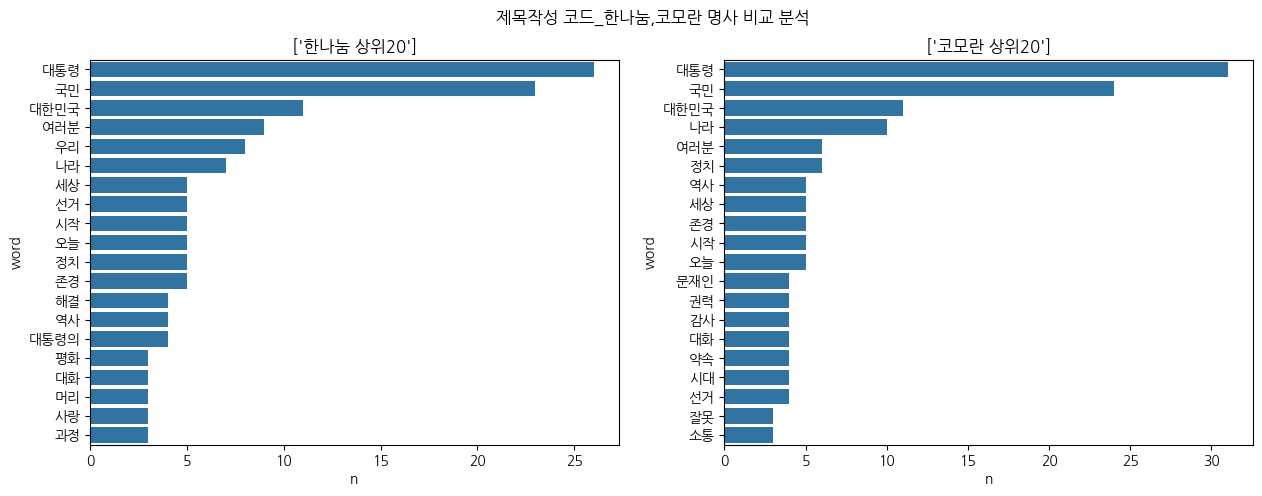

In [96]:
# 단어 빈도 막대그래프
# 형태소 분석기 별 막대 그래프 2개 같이 그리기

fig, axes = plt.subplots(1,2, figsize=(15,5))   # 1,2 가로나누기

plt.suptitle('제목작성 코드_한나눔,코모란 명사 비교 분석')
#ax 축정보?
sns.barplot(data=h_top20,x='n',y='word',ax=axes[0])
axes[0].set_title(['한나눔 상위20'])

sns.barplot(data=k_top20,x='n',y='word',ax=axes[1])
axes[1].set_title(['코모란 상위20'])

plt.show()

### 폰트

In [101]:
font_path='/content/drive/MyDrive/abc부트캠프/visual/3 텍스트분석/data/BMDOHYEON_ttf.ttf'

# 1)단어와 빈도표를 담는 딕셔너리 만들기
k_dic=k_word_df.set_index('word').to_dict()['n']
k_dic

{'대통령': 31,
 '국민': 24,
 '대한민국': 11,
 '나라': 10,
 '여러분': 6,
 '정치': 6,
 '역사': 5,
 '세상': 5,
 '존경': 5,
 '시작': 5,
 '오늘': 5,
 '문재인': 4,
 '권력': 4,
 '감사': 4,
 '대화': 4,
 '약속': 4,
 '시대': 4,
 '선거': 4,
 '잘못': 3,
 '소통': 3,
 '이번': 3,
 '정부': 3,
 '지지': 3,
 '평화': 3,
 '말씀': 3,
 '머리': 3,
 '갈등': 3,
 '과정': 3,
 '사랑': 3,
 '해결': 3,
 '광화문': 2,
 '마련': 2,
 '기관': 2,
 '어깨': 2,
 '안보': 2,
 '선택': 2,
 '시민': 2,
 '제가': 2,
 '좌절': 2,
 '통합': 2,
 '탄핵': 2,
 '정착': 2,
 '한반도': 2,
 '인재': 2,
 '전국': 2,
 '이웃': 2,
 '공정': 2,
 '불행': 2,
 '빈손': 2,
 '대통령 선거': 2,
 '동반자': 2,
 '문제': 2,
 '강화': 2,
 '국방력': 1,
 '구조': 1,
 '동맹': 1,
 '노력': 1,
 '긴장': 1,
 '군림': 1,
 '권위': 1,
 '기록': 1,
 '기회': 1,
 '국정': 1,
 '마음': 1,
 '로그': 1,
 '구속': 1,
 '광화문광장': 1,
 '관행': 1,
 '계층': 1,
 '고향': 1,
 '공존': 1,
 '경험': 1,
 '계기': 1,
 '경제': 1,
 '계속': 1,
 '결과': 1,
 '결별': 1,
 '겸손': 1,
 '경쟁': 1,
 '대원칙': 1,
 '대로': 1,
 '능력': 1,
 '눈물': 1,
 '눈높이': 1,
 '노심초사': 1,
 '더불어민주당': 1,
 '도쿄': 1,
 '개혁': 1,
 '거짓': 1,
 '격변기': 1,
 '견제': 1,
 '각지': 1,
 '가야': 1,
 '가슴': 1,
 '감내': 1,
 '삼고초려': 1,
 '사안': 1,

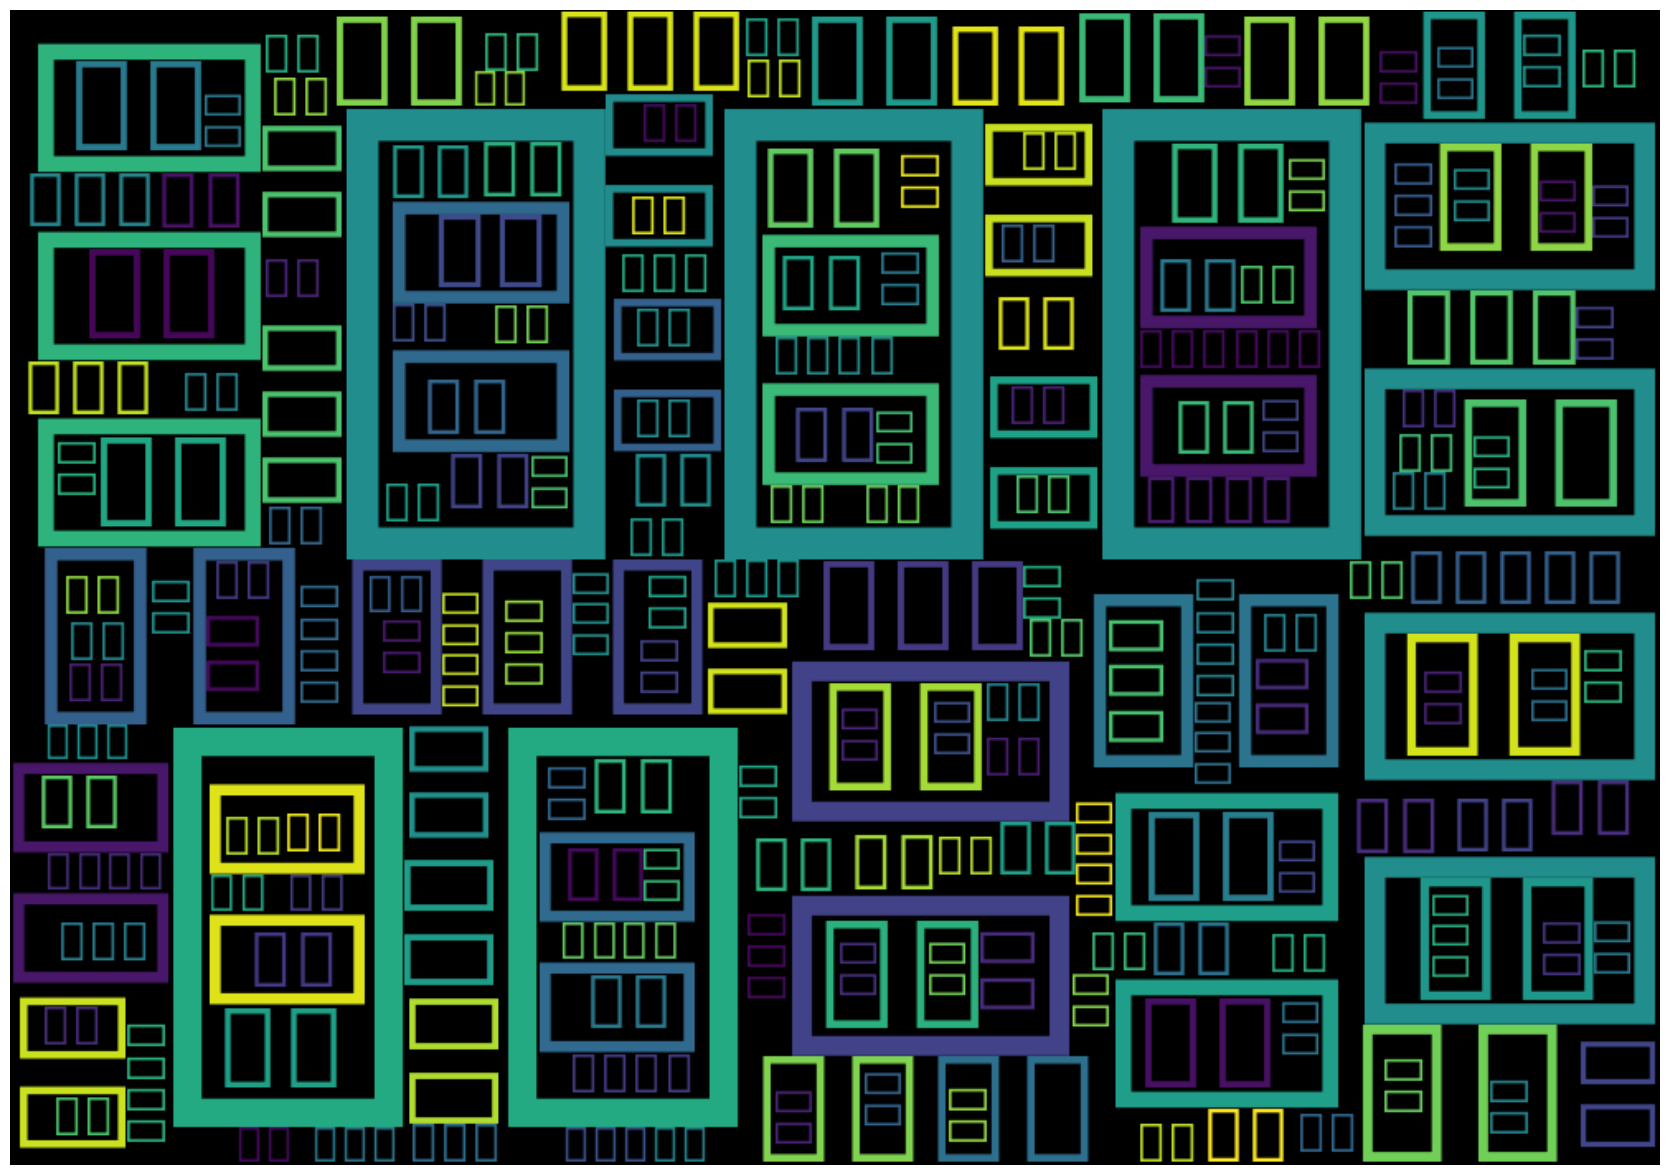

In [102]:
# 2) 딕셔너리를 활용한 워드 클라우드 시각화
from wordcloud import WordCloud

plt.subplots(figsize=(25,15))
wc=WordCloud(background_color='black',width=1000,height=700)
img_wc=wc.generate_from_frequencies(k_dic)


plt.axis('off')


#시각화
plt.imshow(img_wc,interpolation='bilinear')
plt.show()

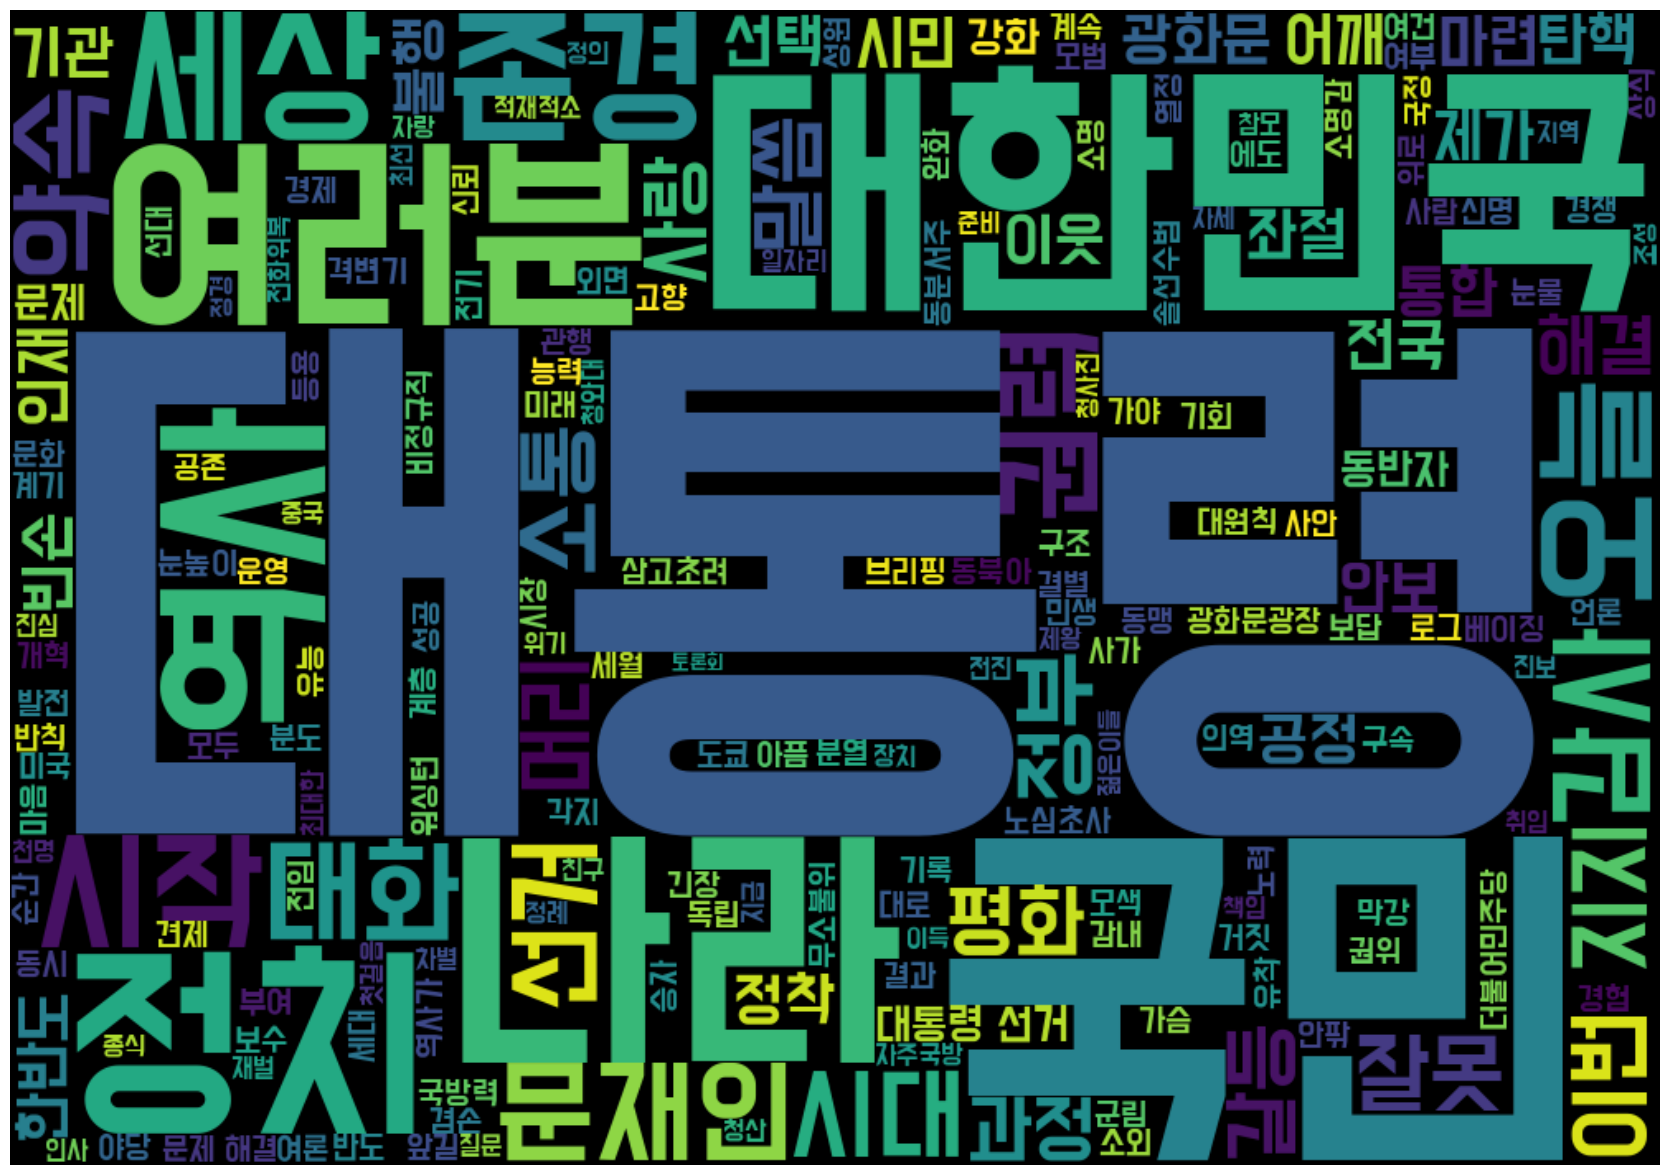

In [103]:
# 2) 딕셔너리를 활용한 워드 클라우드 시각화
from wordcloud import WordCloud

plt.subplots(figsize=(25,15))
wc=WordCloud(background_color='black',width=1000,height=700,font_path=font_path)
img_wc=wc.generate_from_frequencies(k_dic)

plt.axis('off') #눈금제거


#시각화
plt.imshow(img_wc,interpolation='bilinear')
plt.show()

### mask를 활용한 워드 클라우드

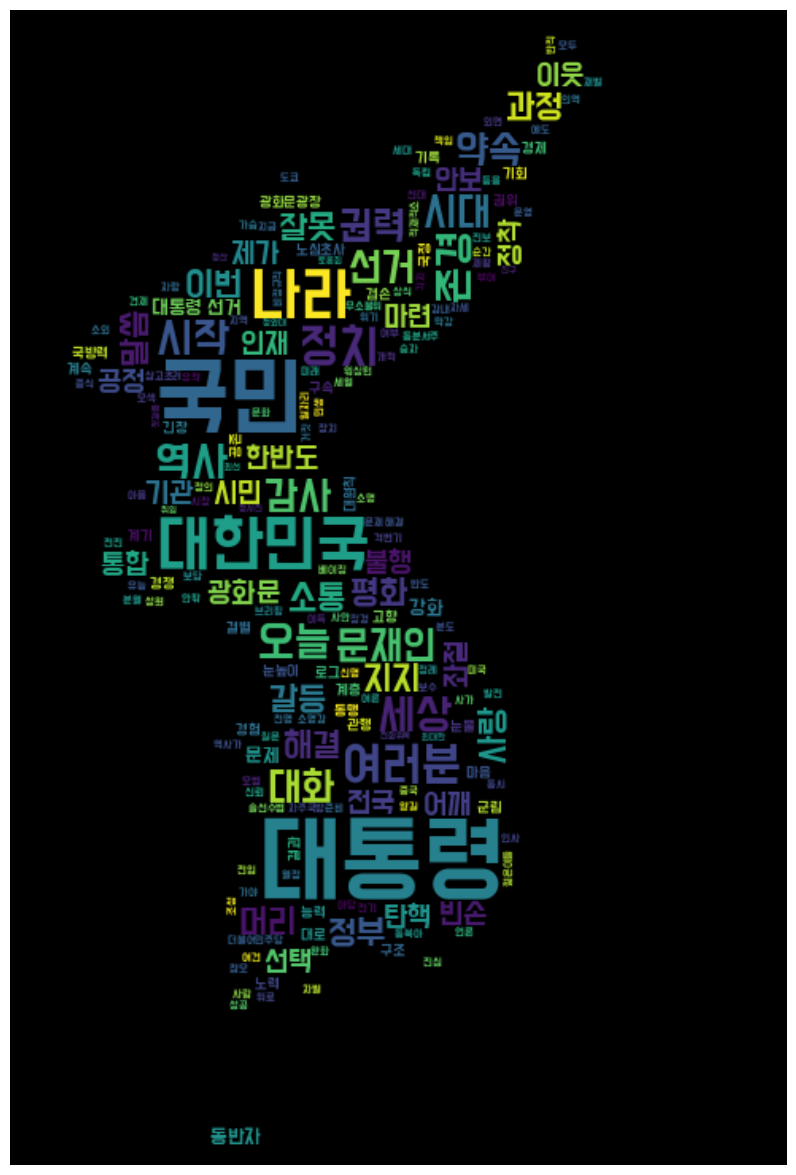

In [104]:
from PIL import Image
import numpy as np
from wordcloud import ImageColorGenerator   #이미지색을 맞춰줌?

icon=Image.open('/content/drive/MyDrive/abc부트캠프/visual/3 텍스트분석/data/korea_mask.jpg')
korea_img=np.array(icon)
from wordcloud import WordCloud

plt.subplots(figsize=(25,15))
wc=WordCloud(width=1000,height=700,
             font_path=font_path,
             mask=korea_img
             )

img_wc=wc.generate_from_frequencies(k_dic)

plt.axis('off') #눈금제거

#시각화
plt.imshow(img_wc,interpolation='bilinear')
plt.show()

In [115]:
from PIL import Image
import numpy as np
from wordcloud import ImageColorGenerator   #이미지색을 맞춰줌?

icon=Image.open('/content/drive/MyDrive/abc부트캠프/visual/3 텍스트분석/data/korea_mask.jpg')

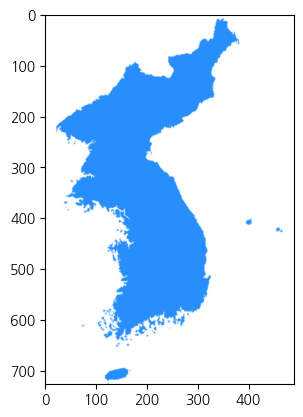

In [116]:
plt.imshow(icon)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
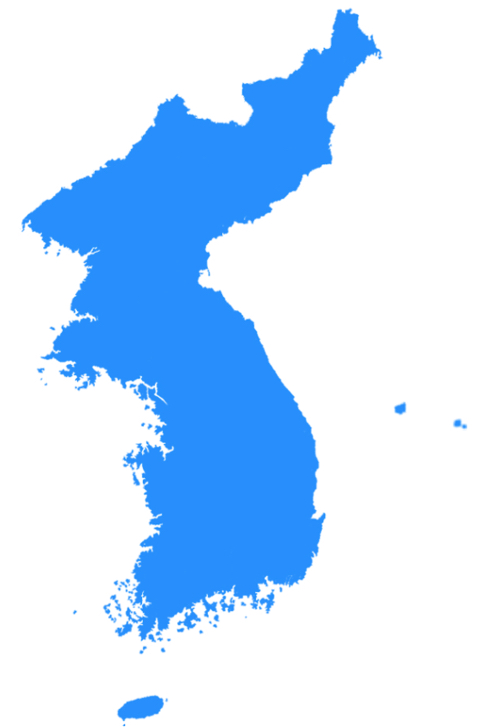

In [117]:
# 1) 이미지를 마스킹 하기
korea_img=np.array(icon)   #눈에 보이지 않은 배열 배정

korea_img

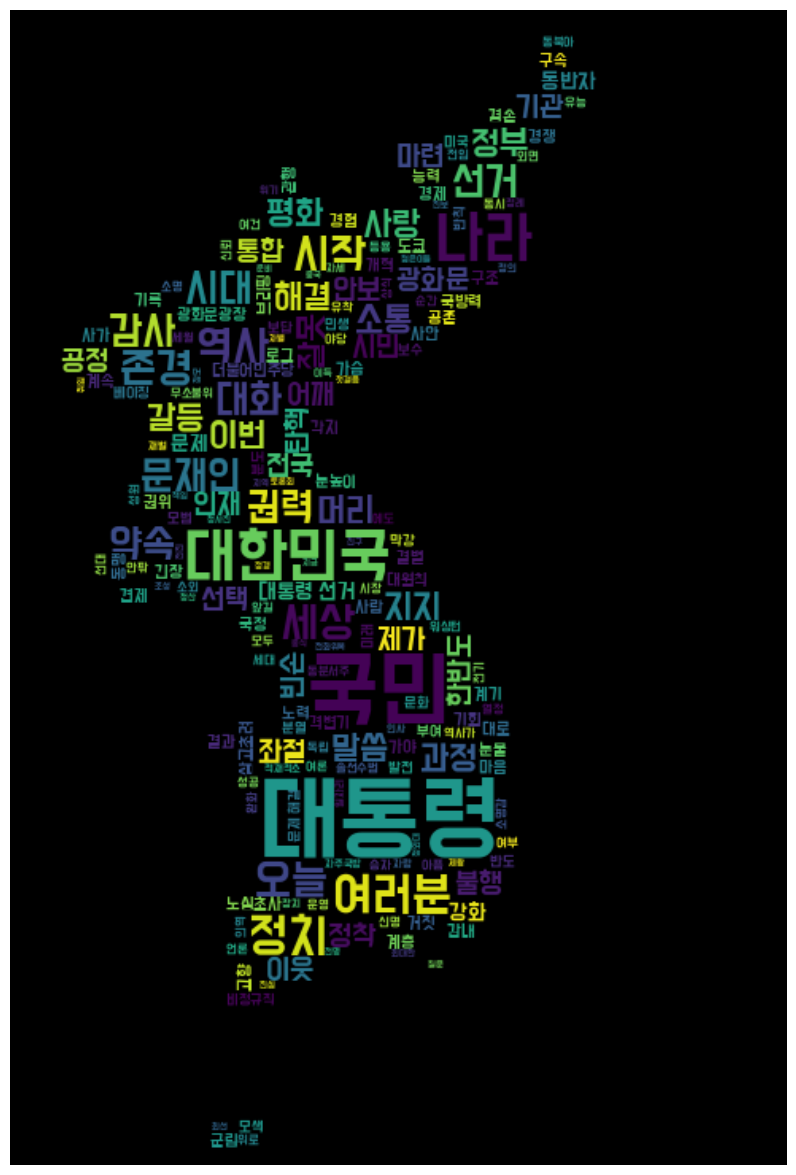

In [118]:
# 2) 이미지 마스킹을 이용한 워드 클라우드
from wordcloud import WordCloud

plt.subplots(figsize=(25,15))
wc=WordCloud(width=1000,height=700,
             font_path=font_path,
             mask=korea_img
             )

img_wc=wc.generate_from_frequencies(k_dic)

plt.axis('off') #눈금제거

#시각화
plt.imshow(img_wc,interpolation='bilinear')
plt.show()

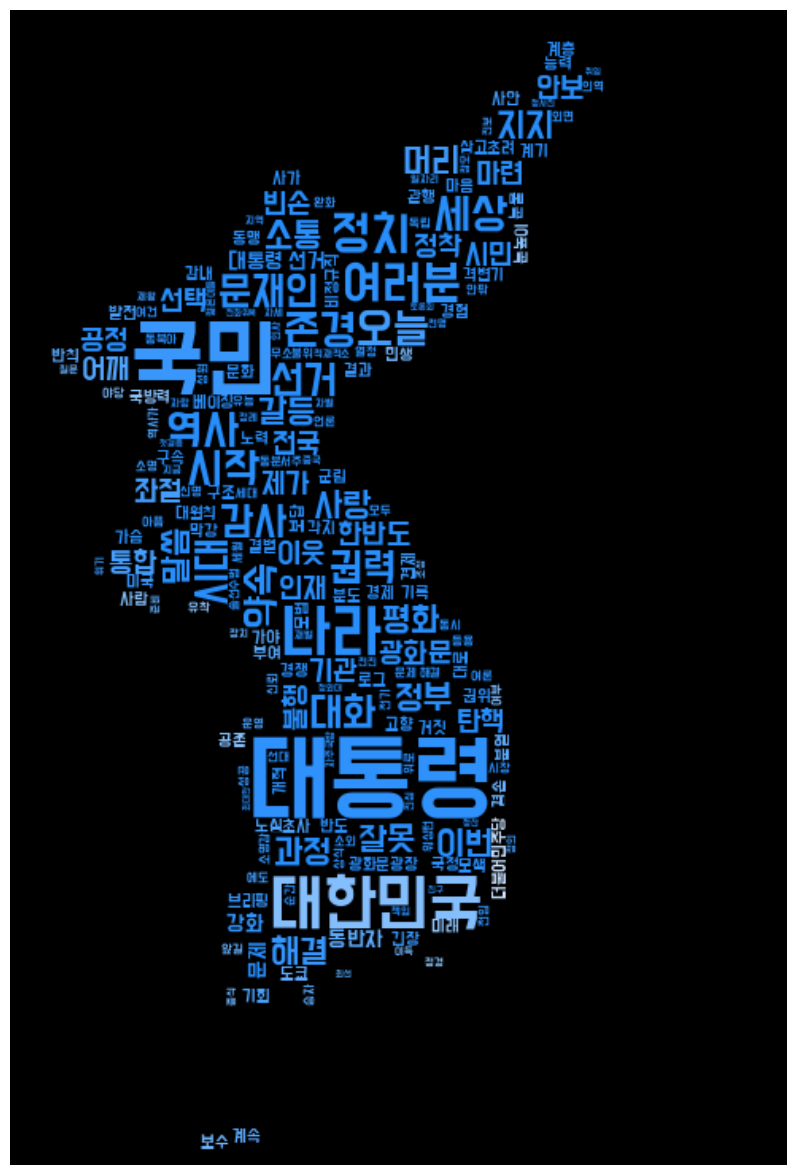

In [119]:
# 2) 이미지 마스킹을 이용한 워드 클라우드

plt.subplots(figsize=(25,15))
wc=WordCloud(width=1000,height=700,
             font_path=font_path,
             mask=korea_img)
img_wc=wc.generate_from_frequencies(k_dic)


#이미지 색과 비슷하게 색상 올리기
img_colors=ImageColorGenerator(korea_img)
img_wc = img_wc.recolor(color_func=img_colors)


plt.axis('off') #눈금제거
#시각화
plt.imshow(img_wc,interpolation='bilinear')
plt.show()